In [1]:
# For division
from __future__ import division
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt

%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as web

# For time stamps
from datetime import datetime

In [2]:
# The tech stocks we'll use for this analysis
ticker = ['MSFT']

# To Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 40,end.month,end.day)


# Creating loop for grabing yahoo finance data and setting as a dataframe

for stock in ticker:   
    
    #To set DataFrame as the Stock Ticker
    
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)['Adj Close']

In [3]:
MSFT.head()

Date
1986-03-13    0.062761
1986-03-14    0.065003
1986-03-17    0.066124
1986-03-18    0.064443
1986-03-19    0.063322
Name: Adj Close, dtype: float64

In [4]:
MSFT.tail()

Date
2019-08-19    138.410004
2019-08-20    137.259995
2019-08-21    138.789993
2019-08-22    137.779999
2019-08-23    133.389999
Name: Adj Close, dtype: float64

In [5]:
MSFT.shape

(8432,)

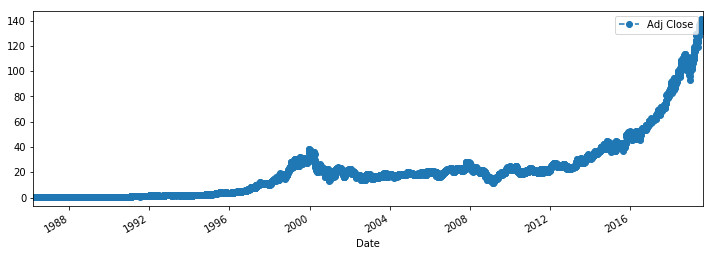

In [6]:
MSFT.plot(figsize=(12,4),legend=True, linestyle='--', marker='o')

In [7]:
MSFT.describe()

count    8432.000000
mean       22.155786
std        25.366915
min         0.058279
25%         2.120091
50%        18.401687
75%        25.029620
max       140.870895
Name: Adj Close, dtype: float64

In [8]:
df = MSFT
df.head()

Date
1986-03-13    0.062761
1986-03-14    0.065003
1986-03-17    0.066124
1986-03-18    0.064443
1986-03-19    0.063322
Name: Adj Close, dtype: float64

In [ ]:
df.describe()

count    8432.000000
mean       22.155786
std        25.366915
min         0.058279
25%         2.120091
50%        18.401687
75%        25.029620
max       140.870895
Name: Adj Close, dtype: float64

In [ ]:
df = df.reset_index()

In [ ]:
df.head()

,Date,Adj Close
0,1986-03-13,0.062761
1,1986-03-14,0.065003
2,1986-03-17,0.066124
3,1986-03-18,0.064443
4,1986-03-19,0.063322


In [ ]:
df[['ds','y']] = df[['Date' ,'Adj Close']]

In [ ]:

df = df[['ds','y']]
df.head()

,ds,y
0,1986-03-13,0.062761
1,1986-03-14,0.065003
2,1986-03-17,0.066124
3,1986-03-18,0.064443
4,1986-03-19,0.063322


In [ ]:
# Importing the prophet library:

import fbprophet

In [ ]:
# After importing the prophet library we need to create an instance of a Prophet object
#Instantiating: Instantiation − The creation of an instance of a class. Method − A special kind of function that is defined in a class definition. Object − A unique instance of a data structure that's defined by its class. An object comprises both data members (class variables and instance variables) and methods.
#https://www.tutorialspoint.com/python/python_classes_objects.htm

m = fbprophet.Prophet()

In [ ]:
# Now we have to use the fit method on the prophet object and pass in our dataframe because we need to fit our model to our historical data.

m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Now it is time to create future dates, using Prophet and its builtin helper function "make_future_dataframe"

future = m.make_future_dataframe(periods=365)
future.tail()

In [ ]:
# Now it is time to predict future stock prices using the predict method

forecast = m.predict(future)

forecast.tail()


In [ ]:
# Visualisation:

m.plot(forecast);

In [ ]:
# If you want to visualize the individual forecast components, you can use Prophet’s built-in plot_components method:

m.plot_components(forecast);

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
forecast.shape

In [ ]:
forecast.describe()